In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df=pd.read_csv("customer_shopping_data.csv")

In [4]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [7]:
df.shape

(99457, 10)

In [8]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [10]:
df.duplicated().sum()

0

<Axes: >

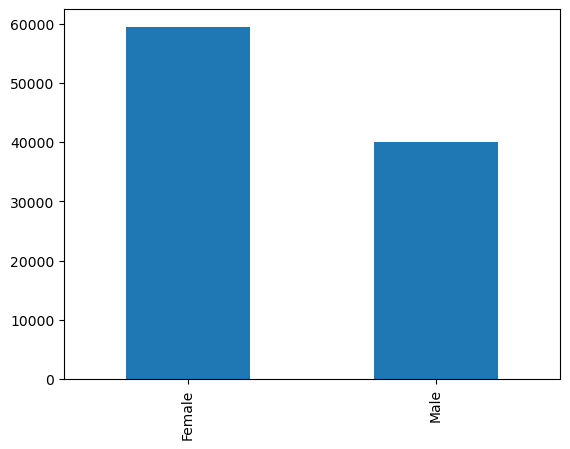

In [11]:
df['gender'].value_counts().plot(kind="bar")

In [12]:
df["age"].describe()

count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

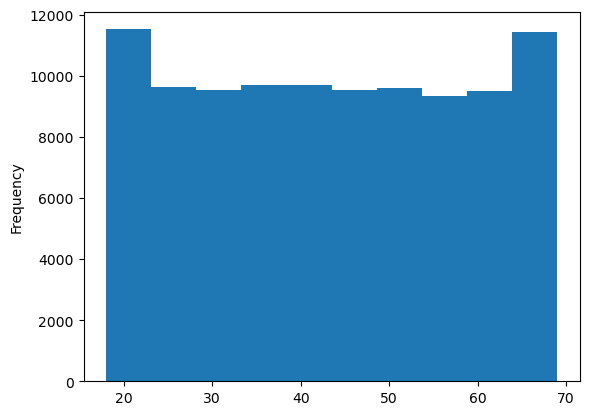

In [13]:
df['age'].plot(kind="hist")

In [14]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


lower_outliers = df[(df['age'] < lower_bound)]
upper_outliers = df[(df['age'] > upper_bound)]

print("IQR:", iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

IQR: 26.0
Lower Bound: -9.0
Upper Bound: 95.0


In [15]:
df['category'].nunique()

8

In [16]:
df["category"].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

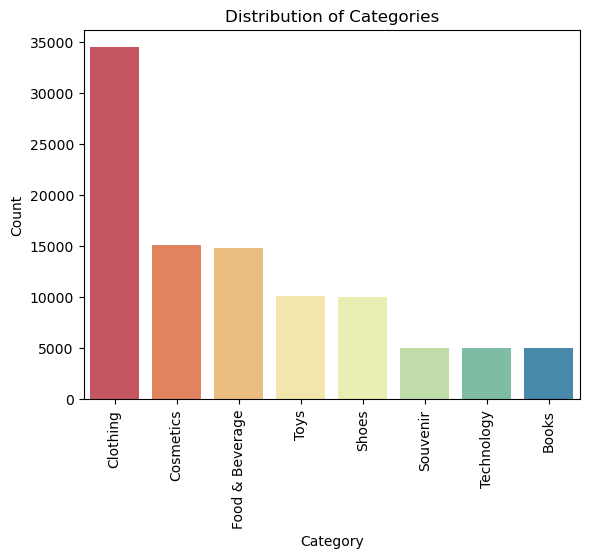

In [17]:
sns.barplot(x=df["category"].value_counts().index,y=df["category"].value_counts().values, palette="Spectral")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories")
plt.xticks(rotation=90)
plt.show()

In [18]:
df['quantity'].unique()

array([5, 3, 1, 4, 2])

In [19]:
df["quantity"].value_counts()

3    20149
5    19990
2    19828
1    19767
4    19723
Name: quantity, dtype: int64

In [20]:
df["price"].describe()

count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64

In [21]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


lower_outliers = df[(df['price'] < lower_bound)]
upper_outliers = df[(df['price'] > upper_bound)]

print("IQR:", iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

IQR: 1154.87
Lower Bound: -1686.8549999999998
Upper Bound: 2932.625


In [18]:
df[df['price']>2932.625]



,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
15,I688768,C362288,Male,24,Shoes,5,3000.85,Credit Card,7/11/2021,Viaport Outlet
23,I252275,C313348,Male,44,Technology,5,5250.00,Cash,26/10/2021,Kanyon
53,I160777,C626042,Female,43,Technology,4,4200.00,Cash,22/02/2022,Metrocity
69,I883721,C236859,Female,44,Technology,5,5250.00,Credit Card,19/11/2021,Mall of Istanbul
...,...,...,...,...,...,...,...,...,...,...
99332,I206967,C232954,Female,53,Shoes,5,3000.85,Credit Card,13/03/2022,Metrocity
99374,I221532,C956894,Male,36,Technology,3,3150.00,Credit Card,24/12/2021,Metropol AVM
99387,I429361,C258359,Male,33,Technology,3,3150.00,Credit Card,1/8/2022,Kanyon
99424,I549710,C541824,Female,34,Technology,3,3150.00,Cash,13/01/2021,Metrocity


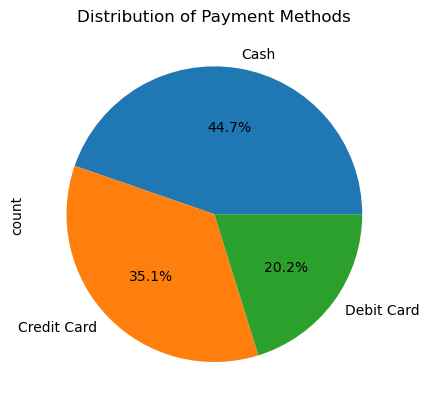

In [19]:
df['payment_method'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Distribution of Payment Methods")
plt.show()

In [20]:
df['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

C:\Users\20114\AppData\Local\Temp\ipykernel_12836\3578827238.py:1: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x=df["shopping_mall"].value_counts().index,y=df["shopping_mall"].value_counts().values, palette="Spectral")


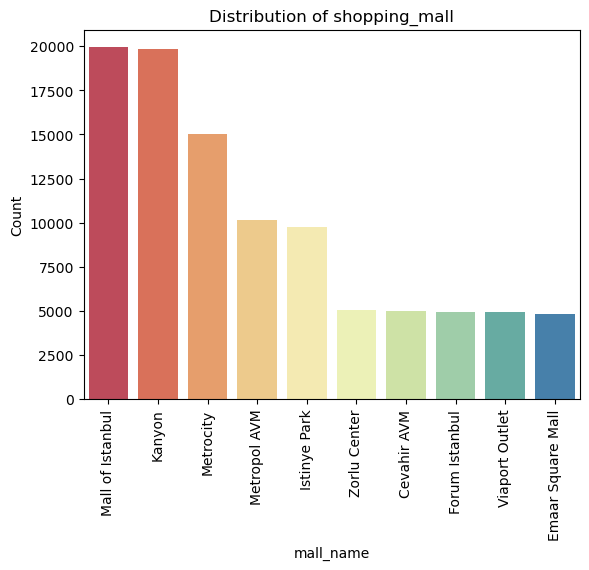

In [21]:
sns.barplot(x=df["shopping_mall"].value_counts().index,y=df["shopping_mall"].value_counts().values, palette="Spectral")
plt.xlabel("mall_name")
plt.ylabel("Count")
plt.title("Distribution of shopping_mall")
plt.xticks(rotation=90)
plt.show()


In [22]:
df.groupby('gender')['age'].value_counts()

gender  age
Female  37     1280
        40     1224
        28     1213
        22     1208
        51     1202
               ... 
Male    49      724
        25      719
        44      718
        55      715
        32      711
Name: count, Length: 104, dtype: int64

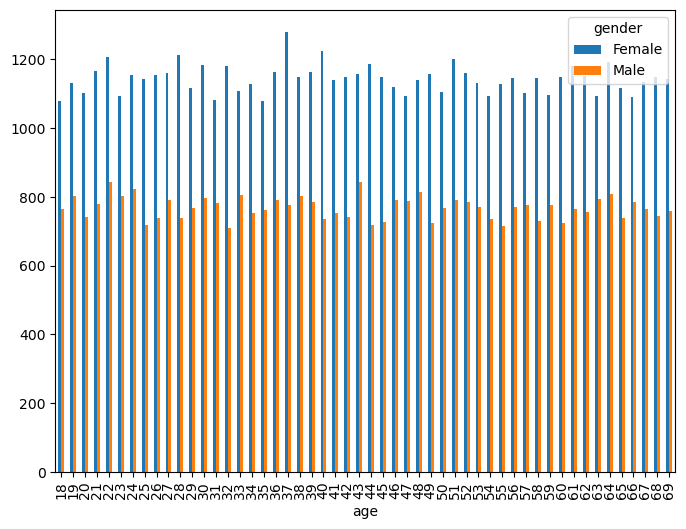

In [23]:
pd.crosstab(df['age'],df['gender']).plot(kind="bar",figsize=(8,6))
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='category'>

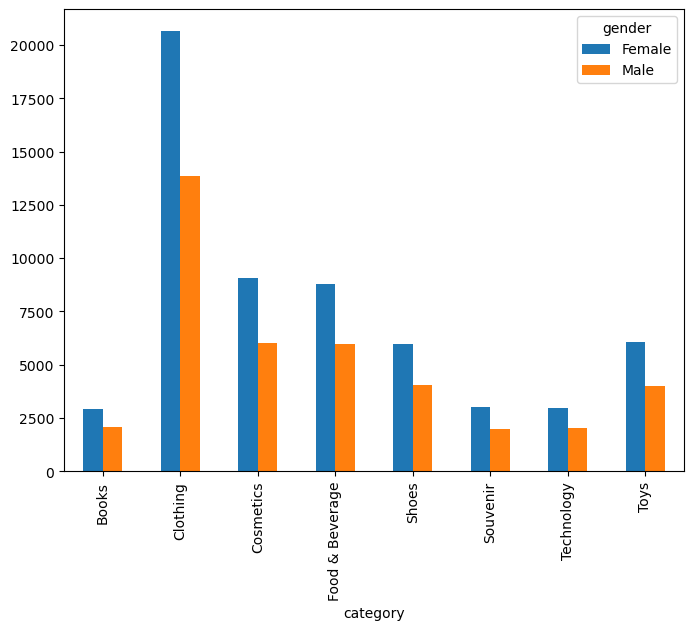

In [24]:
pd.crosstab(df['category'],df['gender']).plot(kind="bar",figsize=(8,6))

<Axes: xlabel='category'>

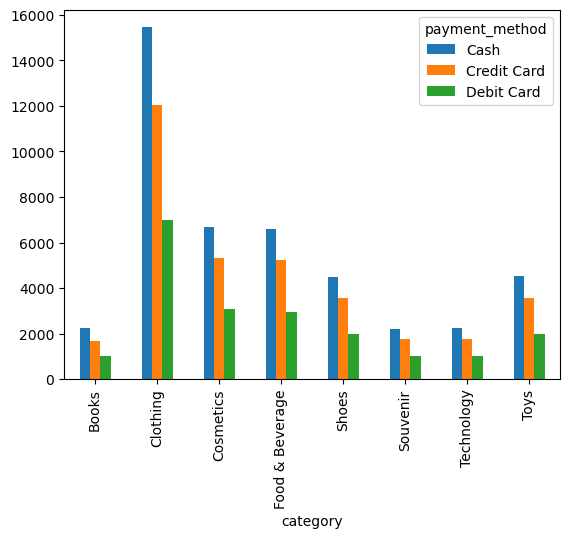

In [25]:
pd.crosstab(df['category'],df['payment_method']).plot(kind="bar")

<Axes: xlabel='shopping_mall'>

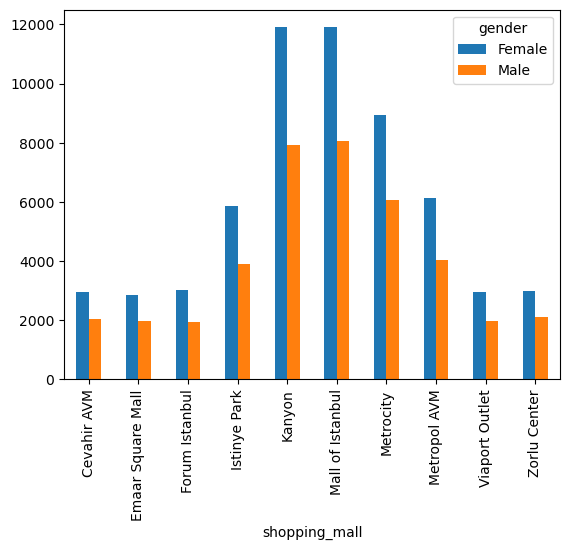

In [26]:
pd.crosstab(df['shopping_mall'],df['gender']).plot(kind="bar")

In [27]:
pd.crosstab(df['gender'],df['category'],values= df['price'],aggfunc="sum")


category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,132956.4,18616663.12,1108432.26,137873.26,10746644.02,105288.48,9425850.0,658094.08
Male,94020.9,12459021.52,740174.64,93695.45,7388692.87,69148.35,6346200.0,428610.56


In [28]:
pd.crosstab([df['gender'],df['shopping_mall']],df['category'],df['price'],aggfunc="sum")


category                     Books    Clothing  Cosmetics  Food & Beverage  \
gender shopping_mall                                                         
Female Cevahir AVM         6726.60   927547.28   53630.54          6940.21   
       Emaar Square Mall   6953.85   860329.36   56924.00          6045.88   
       Forum Istanbul      6999.30   961156.24   58591.06          6459.05   
       Istinye Park       11983.65  1864697.12  105797.32         13739.21   
       Kanyon             25679.25  3742897.84  221556.34         27452.27   
       Mall of Istanbul   27436.65  3726693.52  224768.48         27870.67   
       Metrocity          20240.40  2821352.16  161460.86         21171.04   
       Metropol AVM       13347.15  1896805.68  110920.48         14806.13   
       Viaport Outlet      6514.50   905041.28   56517.40          6746.70   
       Zorlu Center        7075.05   910142.64   58265.78          6642.10   
Male   Cevahir AVM         5272.20   626867.12   34764.30          5052.18   
       Emaar Square Mall   4105.65   651473.68   35455.52          4984.19   
       Forum Istanbul      4454.10   610962.88   36634.66          4377.51   
       Istinye Park        8741.55  1185616.08   72944.04          9680.73   
       Kanyon             19301.10  2412643.20  150685.96         18022.58   
       Mall of Istanbul   19513.20  2518871.52  149018.90         18561.27   
       Metrocity          14165.25  1898606.16  110961.14         14204.68   
       Metropol AVM        8893.05  1269638.48   74855.06          9178.65   
       Viaport Outlet      4393.50   625666.80   36146.74          4686.08   
       Zorlu Center        5181.30   658675.60   38708.32          4947.58   

category                       Shoes  Souvenir  Technology       Toys  
gender shopping_mall                                                   
Female Cevahir AVM         564159.80   4480.86    452550.0   33008.64  
       Emaar Square Mall   526949.26   4797.57    527100.0   31431.68  
       Forum Istanbul      484337.19   5477.91    414750.0   36843.52  
       Istinye Park       1052698.18  10639.11    913500.0   69350.40  
       Kanyon             2127002.48  21583.20   1950900.0  128558.08  
       Mall of Istanbul   2139606.05  21020.16   1884750.0  129920.00  
       Metrocity          1543637.24  16375.08   1421700.0   98954.24  
       Metropol AVM       1139122.66  11741.73    803250.0   68418.56  
       Viaport Outlet      562959.46   4387.02    536550.0   31933.44  
       Zorlu Center        606171.70   4785.84    520800.0   29675.52  
Male   Cevahir AVM         319890.61   3823.98    366450.0   22507.52  
       Emaar Square Mall   344497.58   3718.41    307650.0   17991.68  
       Forum Istanbul      391310.84   3612.84    291900.0   18206.72  
       Istinye Park        753813.52   7730.07    596400.0   39746.56  
       Kanyon             1513028.57  13900.05   1251600.0   85944.32  
       Mall of Istanbul   1528632.99  13243.17   1335600.0   86231.04  
       Metrocity          1066502.09   9395.73    964950.0   66304.00  
       Metropol AVM        803627.63   6862.05    662550.0   43975.68  
       Viaport Outlet      319890.61   3249.21    286650.0   22686.72  
       Zorlu Center        347498.43   3612.84    282450.0   25016.32

In [30]:
df.groupby('shopping_mall')['age'].mean()

shopping_mall
Cevahir AVM          43.172511
Emaar Square Mall    43.561630
Forum Istanbul       43.537497
Istinye Park         43.383601
Kanyon               43.498966
Mall of Istanbul     43.440455
Metrocity            43.499301
Metropol AVM         43.212873
Viaport Outlet       43.298942
Zorlu Center         43.532217
Name: age, dtype: float64

In [31]:
pd.crosstab(df['age'] ,df['category'])

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age,,,,,,,,
18,106,646,267,281,171,108,89,176
19,94,687,289,290,207,86,86,197
20,89,641,269,292,197,83,77,196
21,88,667,289,288,198,103,90,224
22,106,735,318,286,188,103,116,199
23,95,626,279,307,202,86,85,217
24,109,684,268,307,204,103,105,197
25,101,651,297,255,183,96,103,177
26,86,662,285,274,207,111,87,184


In [32]:
df.groupby("age")['price'].mean()

age
18    656.975933
19    668.985780
20    678.743671
21    677.850082
22    694.415529
23    670.947217
24    700.899868
25    689.244627
26    701.343238
27    708.155077
28    690.837870
29    703.793401
30    693.021333
31    669.115080
32    648.250656
33    662.816309
34    692.385666
35    703.875339
36    662.056136
37    723.987725
38    699.910834
39    709.014612
40    694.879837
41    683.688451
42    715.374202
43    686.502120
44    722.530221
45    700.984238
46    719.551533
47    678.925027
48    701.189893
49    680.566569
50    675.108783
51    710.439358
52    672.956658
53    696.669968
54    695.190896
55    686.964438
56    651.465057
57    689.359255
58    694.084928
59    661.032471
60    706.480208
61    664.329188
62    680.223782
63    699.488706
64    712.802987
65    697.371999
66    692.556034
67    691.657649
68    702.891358
69    663.268969
Name: price, dtype: float64

In [33]:
pd.crosstab(df['gender'],df['age'],df['price'],aggfunc="mean")

age,18,19,20,21,22,23,24,25,26,27,...,60,61,62,63,64,65,66,67,68,69
gender,,,,,,,,,,,,,,,,,,,,,
Female,668.026154,686.589929,663.015953,688.564768,713.297136,703.839881,727.700745,695.578392,685.874472,674.033431,...,708.236748,655.274390,701.160442,716.003312,708.760620,721.929240,645.772814,700.119736,675.522125,637.724742
Male,641.390065,644.147049,702.102089,661.853508,667.358612,626.037656,663.241703,679.166982,725.507959,758.257747,...,703.690124,678.296065,648.292606,676.726456,718.764104,660.170108,757.575771,679.119178,745.065691,701.787507


In [34]:
pd.crosstab([df['gender'],df['age']],df['category'],values=df['price'],aggfunc="sum")

category      Books   Clothing  Cosmetics  Food & Beverage      Shoes  \
gender age                                                              
Female 18   3226.95  346892.48   20980.56          2285.51  180651.17   
       19   2878.50  347492.64   22322.34          2735.29  225663.92   
       20   2242.20  347792.72   18215.68          2745.75  226264.09   
       21   2272.50  366697.76   23094.88          2792.82  201657.12   
       22   2772.45  386803.12   24599.30          2630.69  210659.67   
...             ...        ...        ...              ...        ...   
Male   65   2075.55  227160.56   13499.12          1605.61  134438.08   
       66   1424.10  241564.40   15776.08          1851.42  165046.75   
       67   2242.20  242764.72   13458.46          1725.90  118233.49   
       68   1681.65  259269.12   11832.06          1720.67  136238.59   
       69   1439.25  237363.28   14596.94          1501.01  135638.42   

category    Souvenir  Technology      Toys  
gender age                                  
Female 18    1958.91    153300.0  11504.64  
       19    1806.42    162750.0  12257.28  
       20    1712.58    119700.0  11970.56  
       21    2252.16    190050.0  14049.28  
       22    2146.59    221550.0  10501.12  
...              ...         ...       ...  
Male   65    1759.50     99750.0   6917.12  
       66    1348.95    161700.0   5985.28  
       67    1642.20    131250.0   8888.32  
       68     997.05    135450.0   7884.80  
       69    1395.87    130200.0   9820.16  

[104 rows x 8 columns]

In [35]:
pd.crosstab(df['age'],df['payment_method'])

payment_method,Cash,Credit Card,Debit Card
age,,,
18,815,650,379
19,841,716,379
20,846,632,366
21,891,665,391
22,926,724,401
23,814,674,409
24,861,734,382
25,844,627,392
26,894,609,393


In [36]:
df.groupby("category")['price'].sum()

category
Books                226977.30
Clothing           31075684.64
Cosmetics           1848606.90
Food & Beverage      231568.71
Shoes              18135336.89
Souvenir             174436.83
Technology         15772050.00
Toys                1086704.64
Name: price, dtype: float64

In [37]:
pd.crosstab(df['category'],df['shopping_mall'])

shopping_mall,Cevahir AVM,Emaar Square Mall,Forum Istanbul,Istinye Park,Kanyon,Mall of Istanbul,Metrocity,Metropol AVM,Viaport Outlet,Zorlu Center
category,,,,,,,,,,
Books,258,236,252,462,1013,1025,752,476,246,261
Clothing,1729,1651,1729,3353,6840,6923,5268,3525,1708,1761
Cosmetics,732,760,770,1458,3023,3050,2265,1541,734,764
Food & Beverage,772,692,712,1490,2909,2957,2244,1517,733,750
Shoes,490,498,458,1001,2017,2023,1457,1074,497,519
Souvenir,240,247,261,515,1037,948,738,531,225,257
Technology,256,263,234,487,997,1017,772,464,256,250
Toys,514,464,531,1015,1987,2000,1515,1033,515,513


In [38]:
pd.crosstab(df['quantity'],df['shopping_mall'])

shopping_mall,Cevahir AVM,Emaar Square Mall,Forum Istanbul,Istinye Park,Kanyon,Mall of Istanbul,Metrocity,Metropol AVM,Viaport Outlet,Zorlu Center
quantity,,,,,,,,,,
1,1022,932,1000,1924,4014,3886,2982,2017,993,997
2,959,963,975,1976,3892,3976,3040,2045,982,1020
3,1036,991,992,1925,4018,4092,3050,2024,992,1029
4,969,955,974,1966,3890,3945,3013,2024,952,1035
5,1005,970,1006,1990,4009,4044,2926,2051,995,994


In [112]:
df.groupby('shopping_mall')['price'].sum()

shopping_mall
Cevahir AVM           3433671.84
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Istinye Park          6717077.54
Kanyon               13710755.24
Mall of Istanbul     13851737.62
Metrocity            10249980.07
Metropol AVM          6937992.99
Viaport Outlet        3414019.46
Zorlu Center          3509649.02
Name: price, dtype: float64

C:\Users\20114\AppData\Local\Temp\ipykernel_12836\963298602.py:4: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x=mall_prices.index, y=mall_prices.values, palette=sns.color_palette("hls", len(mall_prices)))


<Figure size 1000x600 with 0 Axes>

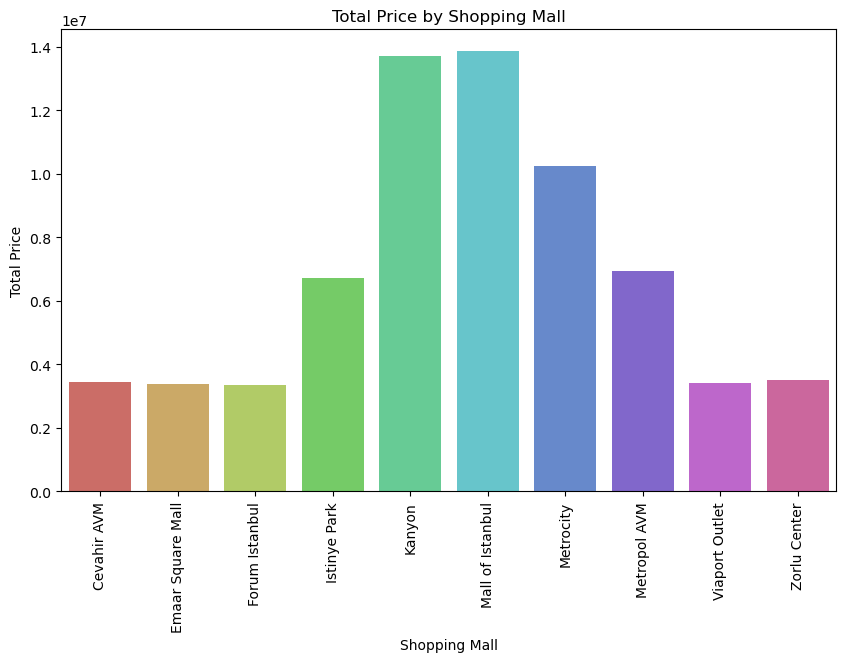

In [114]:
plt.figure(figsize=(10, 6))
mall_prices = df.groupby('shopping_mall')['price'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=mall_prices.index, y=mall_prices.values, palette=sns.color_palette("hls", len(mall_prices)))
plt.xlabel("Shopping Mall")
plt.ylabel("Total Price")
plt.title("Total Price by Shopping Mall")
plt.xticks(rotation=90)
plt.show()

In [149]:
df['date']=pd.to_datetime(df['invoice_date'],format='mixed')

In [155]:
df['day']=df.date.dt.day

In [161]:
df['month']=df.date.dt.month

In [165]:
df['year']=df.date.dt.year

C:\Users\20114\AppData\Local\Temp\ipykernel_12836\3443776106.py:2: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x=day_counts.index, y=day_counts.values, palette=sns.color_palette("hls", len(day_counts)))


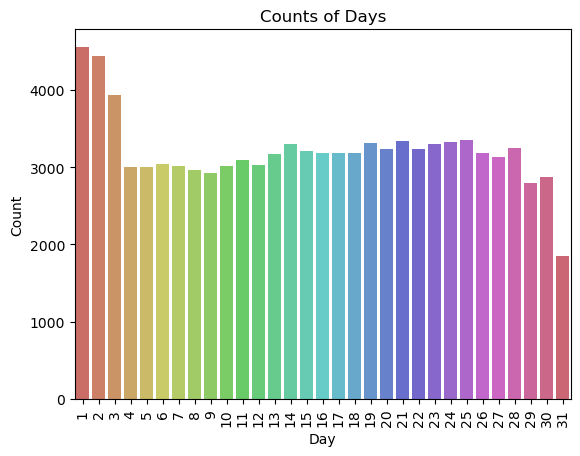

In [175]:
day_counts = df['day'].value_counts()
sns.barplot(x=day_counts.index, y=day_counts.values, palette=sns.color_palette("hls", len(day_counts)))
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Counts of Days")
plt.xticks(rotation=90,)
plt.show()

C:\Users\20114\AppData\Local\Temp\ipykernel_12836\2883692680.py:2: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x=month_counts.index, y=month_counts.values, palette=sns.color_palette("hls", len(day_counts)))

C:\Users\20114\AppData\Local\Temp\ipykernel_12836\2883692680.py:2: UserWarning: The palette list has more values (31) than needed (12), which may not be intended.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette=sns.color_palette("hls", len(day_counts)))


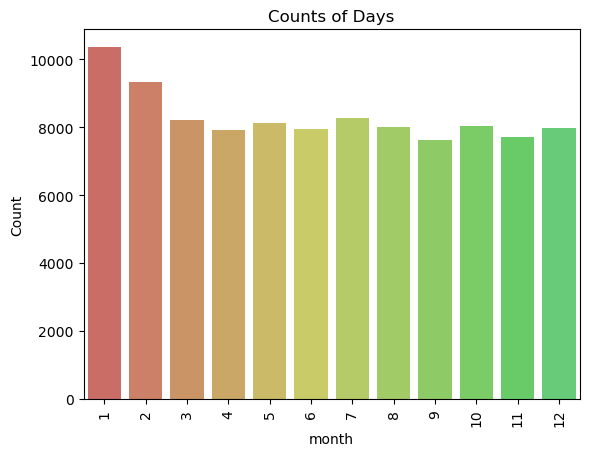

In [177]:
month_counts = df['month'].value_counts()
sns.barplot(x=month_counts.index, y=month_counts.values, palette=sns.color_palette("hls", len(day_counts)))
plt.xlabel("month")
plt.ylabel("Count")
plt.title("Counts of Days")
plt.xticks(rotation=90,)
plt.show()

C:\Users\20114\AppData\Local\Temp\ipykernel_12836\3191118164.py:2: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x=year_counts.index, y=year_counts.values, palette=sns.color_palette("hls", len(day_counts)))

C:\Users\20114\AppData\Local\Temp\ipykernel_12836\3191118164.py:2: UserWarning: The palette list has more values (31) than needed (3), which may not be intended.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette=sns.color_palette("hls", len(day_counts)))


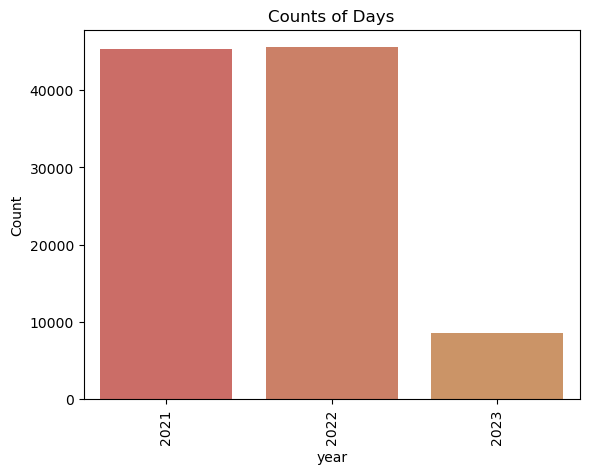

In [179]:
year_counts = df['year'].value_counts()
sns.barplot(x=year_counts.index, y=year_counts.values, palette=sns.color_palette("hls", len(day_counts)))
plt.xlabel("year")
plt.ylabel("Count")
plt.title("Counts of Days")
plt.xticks(rotation=90,)
plt.show()